In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('./titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

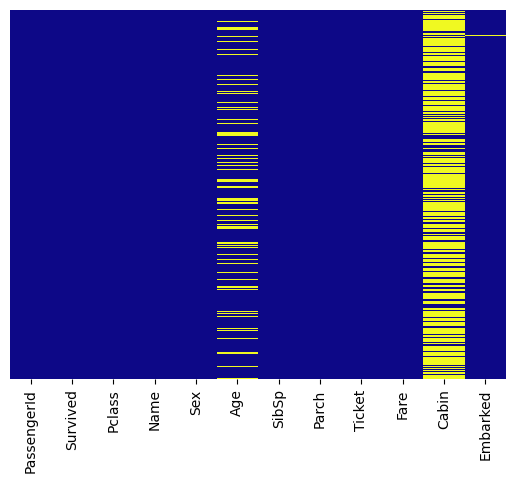

In [9]:
# showing the columns with null(empty/missing) value in yellow color
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

<Axes: xlabel='Survived', ylabel='count'>

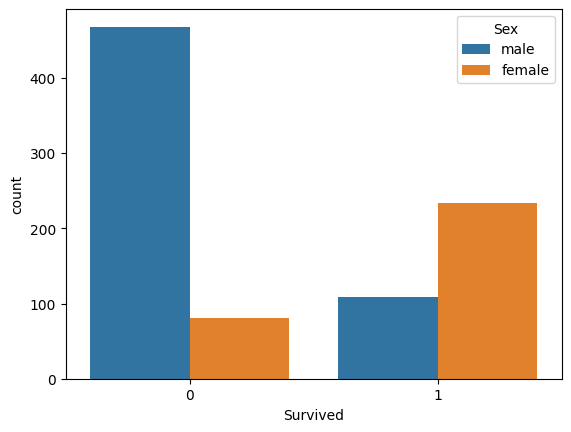

In [10]:
sns.countplot(x='Survived', data=data, hue='Sex')

Here,0=Did not survided and 1=Survived which simplifies the fact that in this accident females had more survival rate than that of males


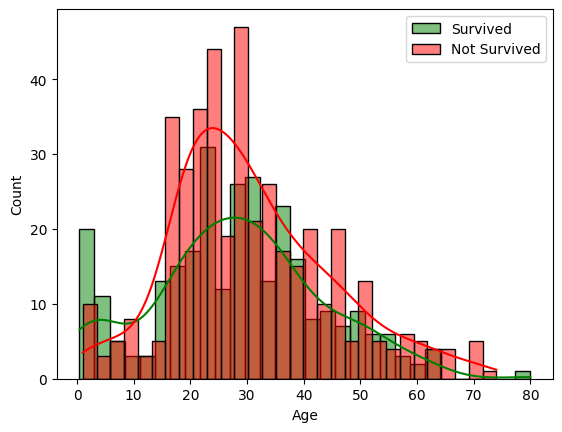

In [11]:
sns.histplot(data[data['Survived']==1]['Age'], color='green', kde=True, bins=30, label="Survived")
sns.histplot(data[data['Survived']==0]['Age'], color='red', kde=True, bins=30, label="Not Survived")
plt.legend()

Following distributions says:

1.Children under 20 years had a higher survival rate.This is probably because women and children were given priority during evacuation.

2.Adults with age 30+ years had a lower survival rate. Many middle-aged men didn’t survive, as priority was given to women and children.

3.Young Adults of 20-30 years had a mixed survival rate . Some survived, but many did not, especially men in third class.

<Axes: xlabel='Survived', ylabel='Fare'>

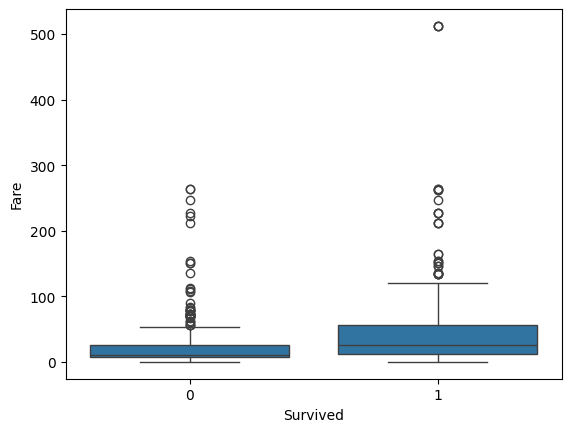

In [12]:
sns.boxplot(x='Survived', y='Fare', data=data)

Confirms that passengers who paid higher fares had better survival rates 

<Axes: xlabel='Pclass', ylabel='Age'>

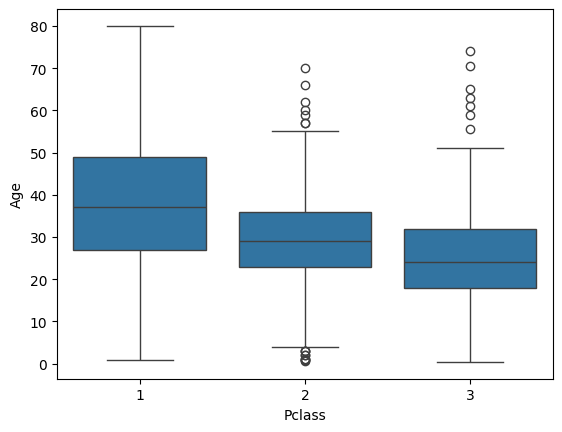

In [13]:
# plotting age of passengers based on different class to impute(fill) average of each pclass accordingly
sns.boxplot(x='Pclass', y='Age', data=data)

Average per pclassess,

pclass_average={"1": 37,
"2": 29,
"3": 24
}



In [14]:
# data cleaning
# filling empty age field value with average according to pclasses
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

/var/folders/pz/818j1dcs3j9c2z8cdz38gf3r0000gn/T/ipykernel_44861/2034837374.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/pz/818j1dcs3j9c2z8cdz38gf3r0000gn/T/ipykernel_44861/2034837374.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

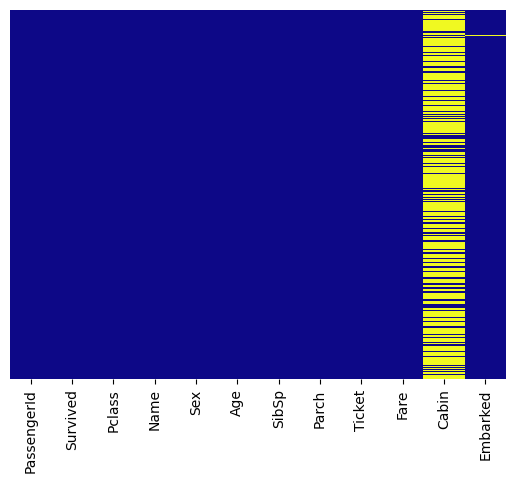

In [15]:
# checking if some field have empty value
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='plasma')


In [16]:
# getting dummy variables
#since sex is a categorical variable we need to convert it to numerical value
sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)

Features to delete:

1.PassengerId: This is just an identifier and has no effect on survival.

2.Name: While names contain titles (Mr., Mrs., etc.), which can be useful, the full name itself doesn't contribute much. We can extract the title if needed but drop the full name.

3.Ticket: The ticket number is mostly unique and does not provide a direct correlation to survival.

4.Cabin: Many values are missing, making it unreliable. Though it might indicate class and location on the ship, it is too sparse.

5.Embarked: While it indicates the port of embarkation, its impact on survival is minimal compared to other features. However, it might still be useful in some models.

In [17]:
# deleting unwanted field to remove model complexity
data.drop(['PassengerId','Name','Ticket','Cabin', 'Sex', 'Embarked',  ], axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [18]:
from sklearn.preprocessing import StandardScaler
#standardizing fare
scaler = StandardScaler()
data['Fare'] = scaler.fit_transform(data[['Fare']])

In [19]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [20]:
# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# creating model
logmodel = LogisticRegression()
# training model
logmodel.fit(X_train, y_train)

LogisticRegression()

In [21]:
# predicting values
predictions = logmodel.predict(X_test)

# checking accuracy with confusion matrix which is used to evaluate classificaton model
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[86 13]
 [43 37]]


In [22]:
# classification report
c_report = classification_report(y_test, predictions)
print(c_report)

              precision    recall  f1-score   support

           0       0.67      0.87      0.75        99
           1       0.74      0.46      0.57        80

    accuracy                           0.69       179
   macro avg       0.70      0.67      0.66       179
weighted avg       0.70      0.69      0.67       179

